# TCS RIO 125
# Name of the student: MONISH V S
# Project: Automate extraction of handwritten text from an image
# Name of the organisation: TCS ION
# Name of  the Industry mentor: Snehal Tandel
# Name of the Institution: Government College of Engineering,Erode


# using pytesseract 

In [1]:
!pip install pytesseract

     |████████████████████████████████| 3.3 MB 1.4 MB/s eta 0:00:01


from PIL import Image
file_name='dataset/test_image_1.png'
img = Image.open(file_name)
img

In [2]:
!pip install tesseract-ocr

     |████████████████████████████████| 2.0 MB 1.8 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-fcwx6g6n/tesseract-ocr/setup.py'"'"'; __file__='"'"'/tmp/pip-install-fcwx6g6n/tesseract-ocr/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-ejqzcg1u
       cwd: /tmp/pip-install-fcwx6g6n/tesseract-ocr/
  Complete output (15 lines):
  running bdist_wheel
  running build
  running build_py
  file tesseract_ocr.py (for module tesseract_ocr) not found
  file tesseract_ocr.py (for module tesseract_ocr) not found
  running build_ext
  building 'tesseract_ocr' extension
  creating build
  creating build/temp.linux-x86_64-3.8
  x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall 

## Importing the image

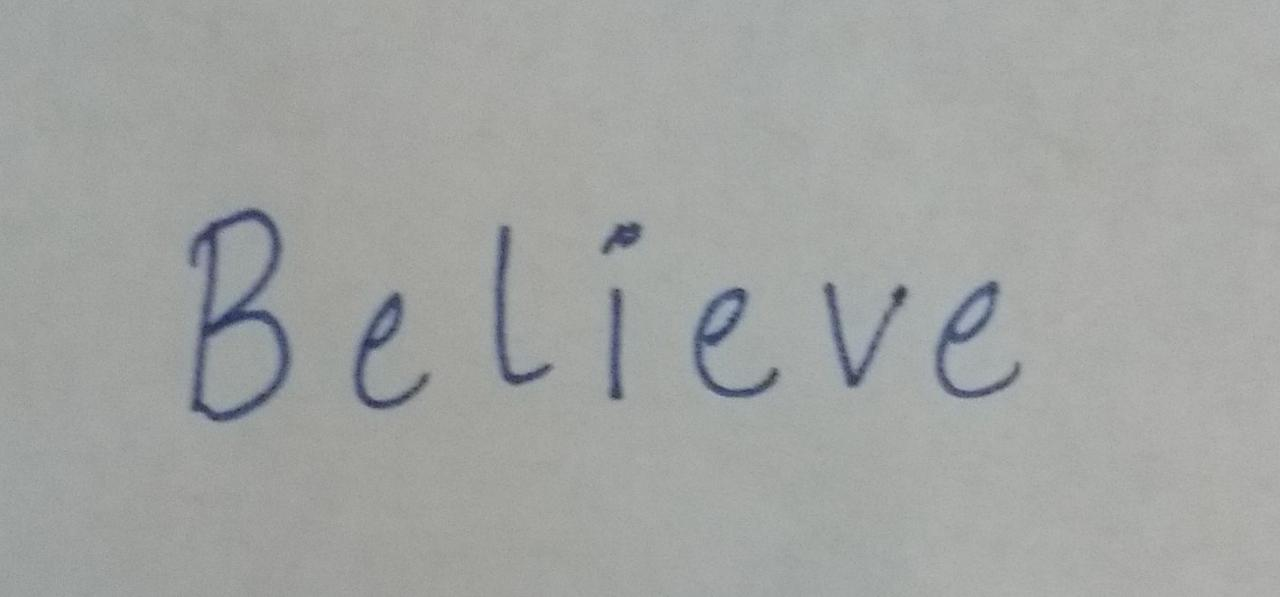

In [1]:
from PIL import Image
file_name='dataset/test_image_1.jpeg'
img = Image.open(file_name)
img

## preprocessing the image

In [4]:
import cv2
import numpy as np
import pytesseract

img = cv2.imread(file_name)

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,3)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((1,1),np.uint8)
    return cv2.dilate(image, kernel, iterations = 3)
    
#erosion
def erode(image):
    kernel = np.ones((1,1),np.uint8)
    return cv2.erode(image, kernel, iterations = 3)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((1,1),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

## calling preprocessing functions

In [16]:
gray = get_grayscale(img)
ero = erode(gray)
dil = dilate(ero)
open = opening(dil)
thresh = thresholding(open)
desk = deskew(thresh)

##   printing the result text from image

In [17]:
print("-----------------------------------------------------------------------------------------------------------------------------")
print ("The Recognized Text From The Input Image Is:")
print("-----------------------------------------------------------------------------------------------------------------------------\n\n")
image = Image.open(file_name)
image = image.resize((300,150))
custom_config = r'-l eng --oem 3 --psm 6' 
text = pytesseract.image_to_string(image,config=custom_config)
print(text)
print("\n\n-----------------------------------------------------------------------------------------------------------------------------")

     

-----------------------------------------------------------------------------------------------------------------------------
The Recognized Text From The Input Image Is:
-----------------------------------------------------------------------------------------------------------------------------


Believe



-----------------------------------------------------------------------------------------------------------------------------


# using keras-ocr

In [7]:
!pip install -q keras-ocr

In [8]:
import keras_ocr

2023-07-03 20:09:33.335909: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 20:09:41.141268: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/monish/.local/lib/python3.8/site-packages/cv2/../../lib64:
2023-07-03 20:09:41.141362: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-03 20:09:56.470053: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerro

In [9]:
import matplotlib.pyplot as plt

In [10]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/monish/.keras-ocr/craft_mlt_25k.h5


2023-07-03 20:12:31.380801: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/monish/.local/lib/python3.8/site-packages/cv2/../../lib64:
2023-07-03 20:12:31.380926: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-03 20:12:31.381009: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (monish-HP-Laptop-15-bs1xx): /proc/driver/nvidia/version does not exist
2023-07-03 20:12:31.390944: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the app

Looking for /home/monish/.keras-ocr/crnn_kurapan.h5


In [22]:
images = [
    keras_ocr.tools.read(img) for img in ['dataset/test_image_3.png',
                                          'dataset/test_image_2.png',]
]

In [23]:
#generate text predictions from the images
prediction_groups = pipeline.recognize(images)

1/1 [==============================] - 0s 144ms/step


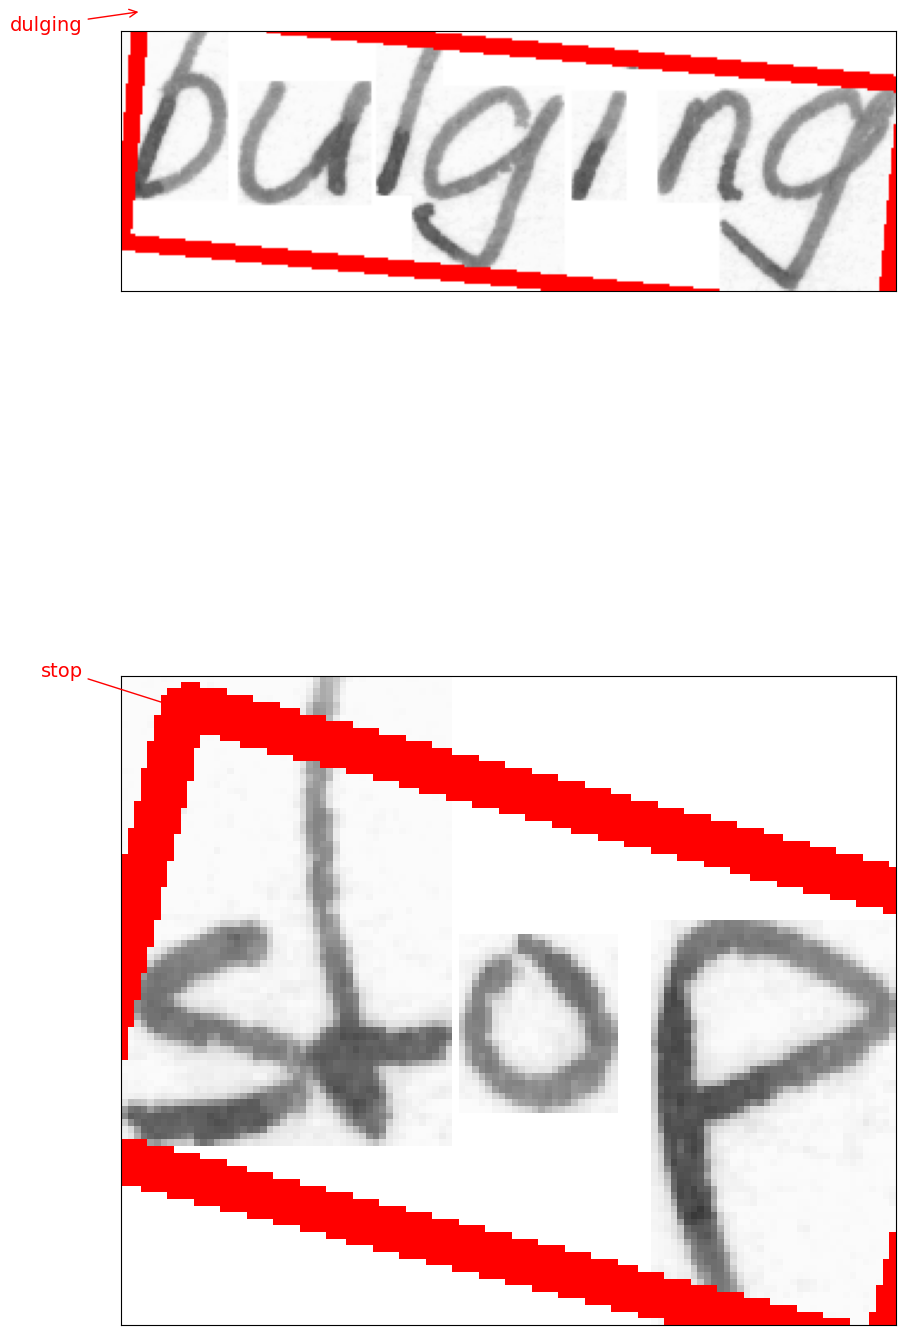

In [24]:
# plot the text predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(10, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image,
                                    predictions=predictions,
                                    ax=ax)

In [25]:
predicted_image = prediction_groups[1]
for text, box in predicted_image:
    print(text)

stop
